In [1]:
import seaborn as sns
# 붖꽃 데이터셋 로딩
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
# 품종 확인
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [3]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
X = iris.iloc[:, :4].values # 독립변수
y = iris.iloc[:,4].values # 종속변수
print(y[:5])
encoder = LabelEncoder() # 문자열에 label을 붙임
y1 = encoder.fit_transform(y)
print(y1[:5])
y2=pd.get_dummies(y1).values # 종속변수에 대한 원핫인코딩 처리
print(y2[:5])

['setosa' 'setosa' 'setosa' 'setosa' 'setosa']
[0 0 0 0 0]
[[ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]]


In [4]:
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
from sklearn.model_selection import train_test_split

# 학습용, 검증용 데이터셋 구분
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, stratify=y, random_state=10)

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

# 모델 생성
model = Sequential()
model.add(Dense(64, input_shape=(4,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))
sgd = SGD(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

c:\python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,675 (18.26 KB)

 Trainable params: 4,675 (18.26 KB)

 Non-trainable params: 0 (0.00 B)

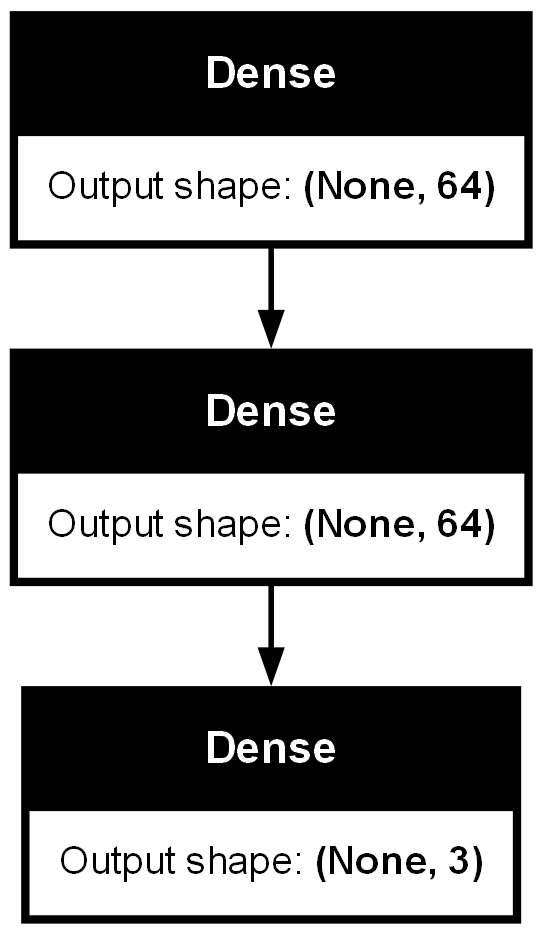

In [8]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

In [9]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
# monitor : 기준
# patience : 횟수
es = EarlyStopping(monitor='val_loss', patience=10)

# 학습과정에서 만들어진 최적의 파라미터 조합으로 모형을 저장
mc = ModelCheckpoint("iris_best.keras", save_best_only=True)

# 학습이 잘 안될 때 학습률을 동적으로 조절하는 옵션
rlr = ReduceLROnPlateau(factor=0.1, patience=5) # 기존 학습률 * factor(배수)

# 학습 과정의 주요 history를 csv 로 저장
csvlogger = CSVLogger("mylog.csv")
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=100, 
                 callbacks=[es, mc, rlr, csvlogger])

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3385 - loss: 1.1979 - val_accuracy: 0.3333 - val_loss: 0.9943 - learning_rate: 0.0100
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3464 - loss: 0.9764 - val_accuracy: 0.3750 - val_loss: 0.9774 - learning_rate: 0.0100
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3555 - loss: 0.9377 - val_accuracy: 0.7917 - val_loss: 0.9150 - learning_rate: 0.0100
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6589 - loss: 0.9012 - val_accuracy: 0.6667 - val_loss: 0.9145 - learning_rate: 0.0100
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7266 - loss: 0.8806 - val_accuracy: 0.8333 - val_loss: 0.8556 - learning_rate: 0.0100
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6810 - loss: 0.8633 - val_accuracy: 0.8333 - val_loss: 0.8363 - learning_rate: 0.0100
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7292 - loss: 0.8469 - val_accuracy: 

In [15]:
from keras.models import load_model
model = load_model('iris_best.keras')
model.evaluate(X_test, y_test, verbose=0)

[0.4180520474910736, 0.8333333134651184]

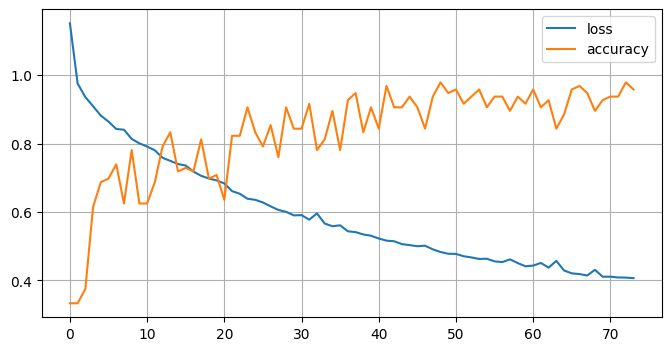

In [16]:
import matplotlib.pyplot as plt
# 그래프 출력
plt.figure(figsize=(8,4))
plt.plot(hist.history['loss']) # 손실률
plt.plot(hist.history['accuracy']) #정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [12]:
# 모델 평가

loss, accuracy = model.evaluate(X_test, y_test,  verbose=0)

print("정확도 = {:.2f}".format(accuracy))

정확도 = 0.83


In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
print(pred[:10])

y_test_class = np.argmax(y_test,axis=1)
pred_class = np.argmax(pred,axis=1)

print(y_test_class[:10])
print(pred_class[:10])
print(confusion_matrix(y_test_class,pred_class))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[0.02741682 0.42296872 0.5496145 ]
 [0.9017575  0.07772955 0.02051294]
 [0.0358164  0.39094597 0.5732376 ]
 [0.01828348 0.3809714  0.6007452 ]
 [0.09331699 0.51074886 0.3959341 ]
 [0.00945422 0.32701194 0.6635339 ]
 [0.84136283 0.12382398 0.03481319]
 [0.0098743  0.28826508 0.7018606 ]
 [0.01571779 0.29405367 0.6902286 ]
 [0.9633302  0.03120538 0.00546441]]
[1 0 1 2 1 2 0 2 2 0]
[2 0 2 2 1 2 0 2 2 0]
[[10  0  0]
 [ 0  5  5]
 [ 0  0 10]]


In [14]:
# 모델 저장
model.save('c:/data/iris/iris.keras')